## Importing Libraries

In [1]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import *
from model import *

## Transformations applied on train and test data

In [3]:
#Training data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1), #Cropping the data to 22x22 randomly to increase the training set size
    transforms.Resize((28, 28)), #resizing them to 28x28
    transforms.RandomRotation((-15., 15.), fill=0), #Random rotation applied
    transforms.ToTensor(), #Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)), #Normalising the data on mean and std
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


## Downloading data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

## Sample image

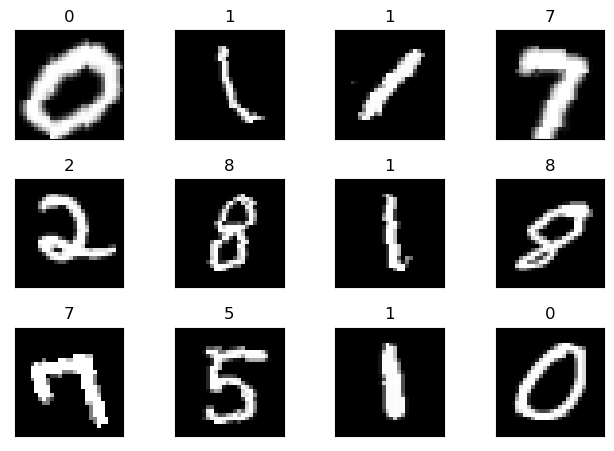

In [6]:

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Training the data and calculating validation results

In [7]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [8]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
train_criterion = nn.CrossEntropyLoss() #Loss function
test_criterion = nn.CrossEntropyLoss() #Loss function
num_epochs = 20

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc_val, train_loss = train(model, device, train_loader, optimizer, train_criterion)
    print(train_acc_val)
    test_acc_val, test_loss = test(model, device, test_loader, test_criterion)
    
    train_acc.append(train_acc_val) #Storing training loss for each epoch
    train_losses.append(train_loss)
    test_acc.append(test_acc_val) #Storing testing loss for each epoch
    test_losses.append(test_loss)
    
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1977 Batch_id=117 Accuracy=53.86: 100%|█| 118/118 [02:13<00:00,  1

53.858333333333334


Test set: Average loss: 0.2477, Accuracy: 9213/10000 (92.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1384 Batch_id=117 Accuracy=93.72: 100%|█| 118/118 [05:23<00:00,  2

93.725


Test set: Average loss: 0.0887, Accuracy: 9718/10000 (97.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0388 Batch_id=117 Accuracy=96.13: 100%|█| 118/118 [05:28<00:00,  2

96.13333333333334


Test set: Average loss: 0.0841, Accuracy: 9735/10000 (97.35%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0798 Batch_id=117 Accuracy=97.02: 100%|█| 118/118 [05:21<00:00,  2

97.02166666666666


Test set: Average loss: 0.0533, Accuracy: 9834/10000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0303 Batch_id=117 Accuracy=97.40: 100%|█| 118/118 [04:55<00:00,  2

97.40333333333334


Test set: Average loss: 0.0489, Accuracy: 9846/10000 (98.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1121 Batch_id=117 Accuracy=97.83: 100%|█| 118/118 [04:43<00:00,  2

97.83


Test set: Average loss: 0.0483, Accuracy: 9843/10000 (98.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1097 Batch_id=117 Accuracy=97.85: 100%|█| 118/118 [04:41<00:00,  2

97.85


Test set: Average loss: 0.0411, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0334 Batch_id=117 Accuracy=98.09: 100%|█| 118/118 [04:43<00:00,  2

98.095


Test set: Average loss: 0.0388, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0066 Batch_id=117 Accuracy=98.42: 100%|█| 118/118 [04:07<00:00,  2

98.42166666666667


Test set: Average loss: 0.0293, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0825 Batch_id=117 Accuracy=98.47: 100%|█| 118/118 [04:06<00:00,  2

98.46666666666667


Test set: Average loss: 0.0267, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0304 Batch_id=117 Accuracy=98.50: 100%|█| 118/118 [04:04<00:00,  2

98.50166666666667


Test set: Average loss: 0.0295, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0441 Batch_id=117 Accuracy=98.64: 100%|█| 118/118 [03:58<00:00,  2

98.64166666666667


Test set: Average loss: 0.0337, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0021 Batch_id=117 Accuracy=98.68: 100%|█| 118/118 [03:50<00:00,  1

98.68


Test set: Average loss: 0.0358, Accuracy: 9871/10000 (98.71%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0154 Batch_id=117 Accuracy=98.82: 100%|█| 118/118 [03:49<00:00,  1

98.82


Test set: Average loss: 0.0269, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0474 Batch_id=117 Accuracy=98.83: 100%|█| 118/118 [03:49<00:00,  1

98.83166666666666


Test set: Average loss: 0.0260, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0193 Batch_id=117 Accuracy=99.06: 100%|█| 118/118 [03:49<00:00,  1

99.06166666666667


Test set: Average loss: 0.0213, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0667 Batch_id=117 Accuracy=99.14: 100%|█| 118/118 [03:48<00:00,  1

99.145


Test set: Average loss: 0.0212, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0222 Batch_id=117 Accuracy=99.16: 100%|█| 118/118 [03:48<00:00,  1

99.16333333333333


Test set: Average loss: 0.0211, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0333 Batch_id=117 Accuracy=99.19: 100%|█| 118/118 [03:48<00:00,  1

99.18666666666667


Test set: Average loss: 0.0210, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0332 Batch_id=117 Accuracy=99.12: 100%|█| 118/118 [03:48<00:00,  1

99.12333333333333


Test set: Average loss: 0.0204, Accuracy: 9924/10000 (99.24%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Plots

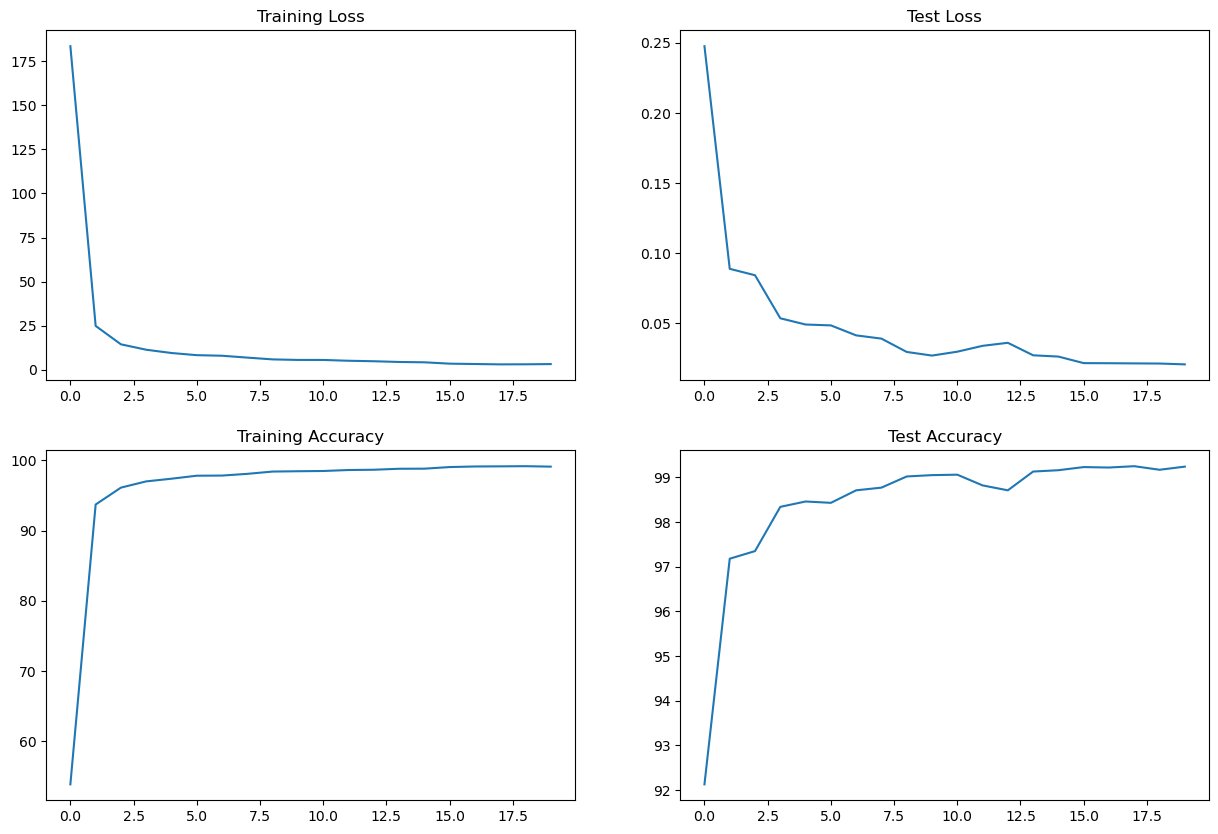

In [9]:
plot_loss(train_losses, train_acc, test_losses, test_acc)

## Neural net summary

In [10]:
get_summary(Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


<function torchsummary.torchsummary.summary(model, input_size, batch_size=-1, device='cuda')>